In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
movies = pd.read_csv(r"C:\Users\Mallela Tejaswi\Downloads\movie_data\movies.csv")
links = pd.read_csv(r"C:\Users\Mallela Tejaswi\Downloads\movie_data\links.csv")
ratings = pd.read_csv(r"C:\Users\Mallela Tejaswi\Downloads\movie_data\ratings.csv")
tags = pd.read_csv(r"C:\Users\Mallela Tejaswi\Downloads\movie_data\tags.csv")

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
movies.shape

(9742, 3)

In [12]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
ratings.shape

(100836, 4)

In [14]:
unique = ratings['userId'].nunique()
unique

610

In [15]:
merged = pd.merge(ratings, movies, on='movieId')
rating_count = merged.groupby('title')['rating'].count()
max_rating_movie = rating_count.idxmax()

max_rating_movie

'Forrest Gump (1994)'

In [16]:
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag']
unique_tags = matrix_tags.unique()

unique_tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

In [17]:
terminator2_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator2_ratings = ratings[ratings['movieId'] == terminator2_movie_id]['rating']
average_rating = terminator2_ratings.mean()

average_rating

3.970982142857143

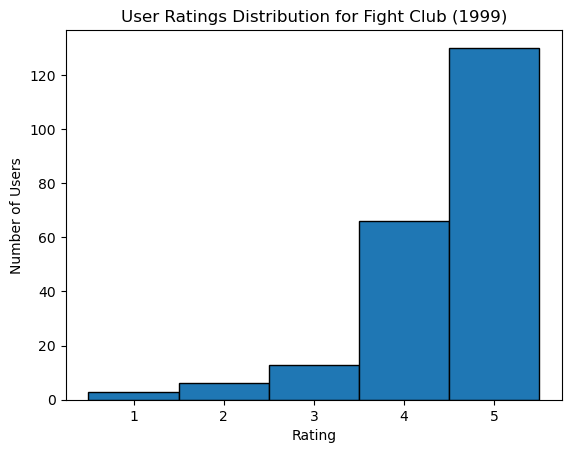

In [20]:
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']
plt.hist(fight_club_ratings, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [21]:
group_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movies, group_ratings, on='movieId', how='inner')
filtered = merged[merged['count'] > 50]
most_pop_movie = filtered[filtered['mean'] == filtered['mean'].max()]


print(most_pop_movie[['title', 'mean']])

                                title      mean
277  Shawshank Redemption, The (1994)  4.429022


In [22]:
group_rating = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movies, group_rating, on='movieId', how='inner')
filtered = merged[merged['count'] > 50]
top5_pop_movies = filtered.nlargest(5, 'count')


print(top5_pop_movies[['title', 'count']])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [25]:
group_rating = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movies, group_ratings, on='movieId', how='inner')
filtered = merged[merged['count'] > 50]
scifi_movies = filtered[filtered['genres'].str.contains('Sci-Fi')]
third_most_pop_scifi_movie = scifi_movies.nlargest(3, 'count').iloc[-1]


print(third_most_pop_scifi_movie[['title', 'count']])

title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


In [26]:
merged = pd.merge(movies, ratings, on='movieId', how='inner')
avg_rating = merged.groupby('movieId')['rating'].mean()
high_rated_movie_id = avg_rating.idxmax()

high_rated_movie_id

53

In [27]:
merged = pd.merge(movies, ratings, on='movieId', how='inner')
avg_rating = merged.groupby('movieId')['rating'].mean()

high_rated_scifi_movie_id = (
    merged[merged['genres'].str.contains('Sci-Fi')]
    .groupby('movieId')['rating']
    .mean()
    .idxmax()
)

high_rated_scifi_movie_id

3687